In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

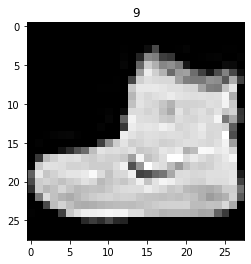

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap="gray")
plt.title(train_labels[0])

In [3]:
def get_preprocessed_image(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_x, train_y = get_preprocessed_image(train_images, train_labels)
#val_x, val_y = get_preprocessed_image(test_images, test_labels)

In [4]:
from tensorflow.keras.utils import to_categorical

#train_y = to_categorical(train_y)
#val_y = to_categorical(val_y)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

image_size = 28

model = Sequential([
    Flatten(input_shape=(image_size, image_size)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
with tf.device("/gpu:0"):
    np.random.seed(3)
    tf.random.set_seed(3)

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
epochs = 30
batch_size = 32

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5586 - accuracy: 0.8072
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4127 - accuracy: 0.8551
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3774 - accuracy: 0.8658
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3574 - accuracy: 0.8718
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3420 - accuracy: 0.8767
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3310 - accuracy: 0.8787
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3221 - accuracy: 0.8826
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3128 - accuracy: 0.8852
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3059 - accuracy: 0.8884
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.299

In [8]:
print(history.history["accuracy"])
print(history.history["loss"])

[0.8071833252906799, 0.8550833463668823, 0.8657500147819519, 0.8717833161354065, 0.8766666650772095, 0.8787000179290771, 0.8826333284378052, 0.8852166533470154, 0.8883833289146423, 0.890333354473114, 0.891700029373169, 0.8949166536331177, 0.8952333331108093, 0.8989499807357788, 0.8988500237464905, 0.9009666442871094, 0.9024333357810974, 0.904033362865448, 0.9044333100318909, 0.9058166742324829, 0.9059000015258789, 0.9073833227157593, 0.9093499779701233, 0.9103999733924866, 0.909766674041748, 0.9124500155448914, 0.9125333428382874, 0.9127500057220459, 0.9132999777793884, 0.9149666428565979]
[0.5586277842521667, 0.4126513600349426, 0.3773626387119293, 0.357394278049469, 0.34198203682899475, 0.330983430147171, 0.3221089243888855, 0.3127822279930115, 0.3059397339820862, 0.29984214901924133, 0.2921113073825836, 0.28580987453460693, 0.2816601097583771, 0.2754024267196655, 0.2736740708351135, 0.26783785223960876, 0.2645680606365204, 0.25955525040626526, 0.25763916969299316, 0.2543591260910034

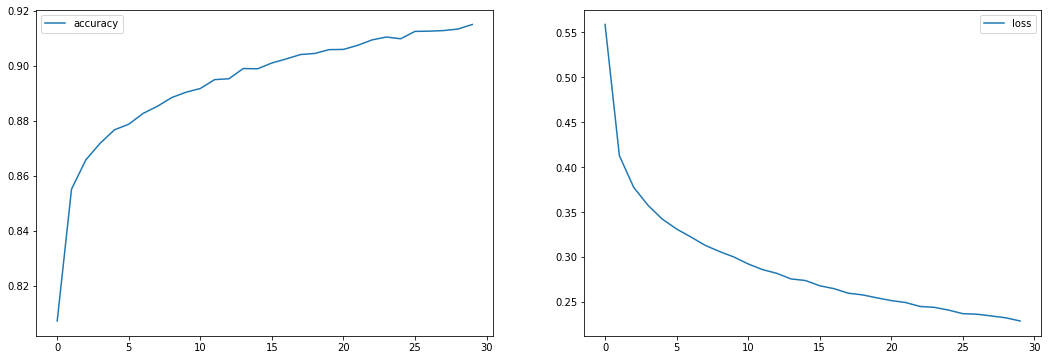

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.legend()

plt.show()



In [10]:
pred_proba = model.predict(test_images)

In [11]:
pred_proba[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
test_oh_labels = to_categorical(test_labels)
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 91.5134 - accuracy: 0.8158A: 0s - loss: 93.6640 - accuracy: 0.815


[91.51336669921875, 0.8158000111579895]

In [13]:
from sklearn.model_selection import train_test_split

tr_images, val_images, tr_labels, val_labels = train_test_split(train_x, train_y, test_size=0.15, random_state=2021)
